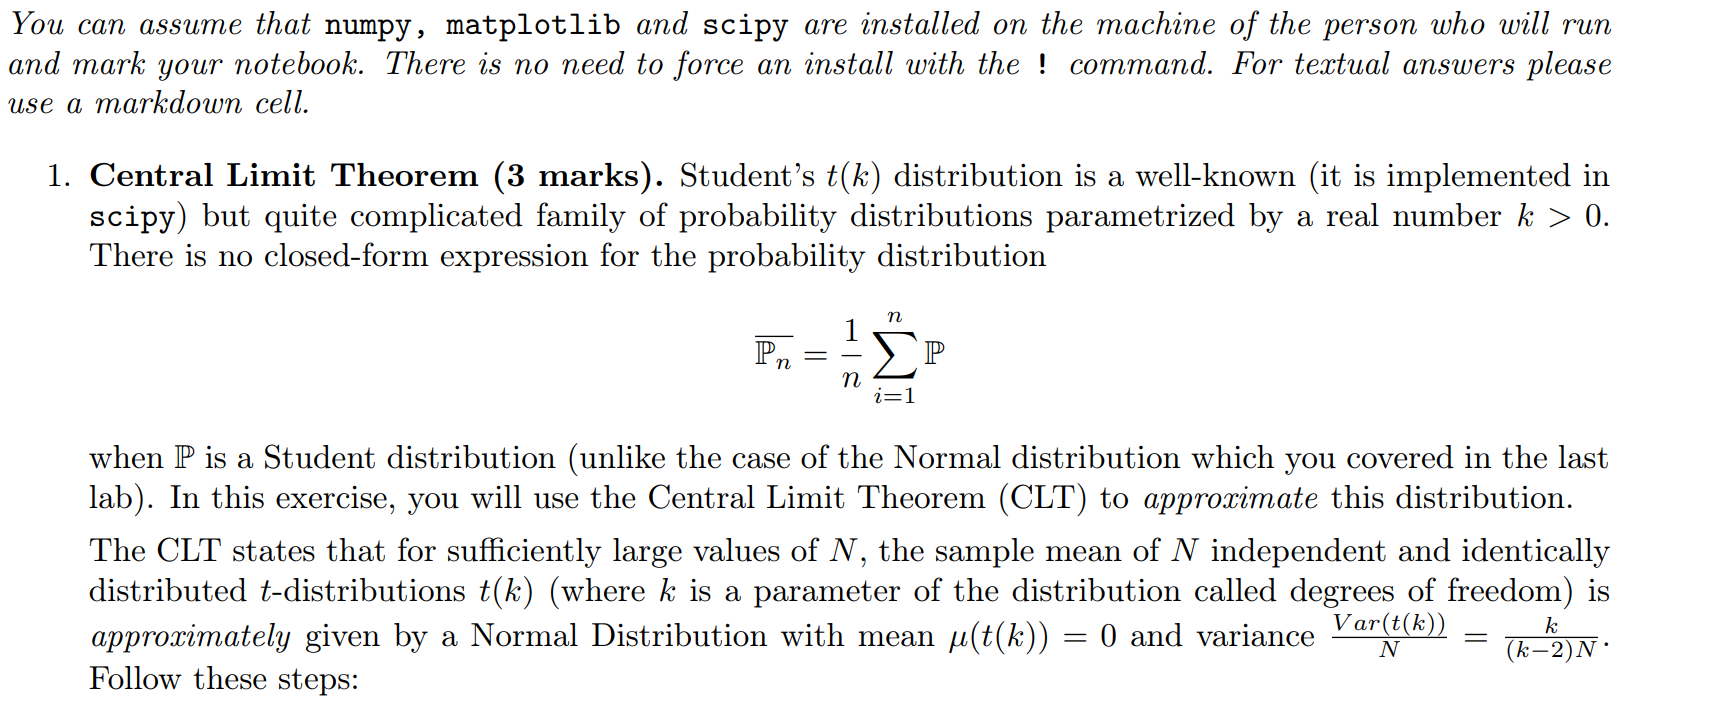

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, probplot, skew, kurtosis
from scipy.optimize import minimize

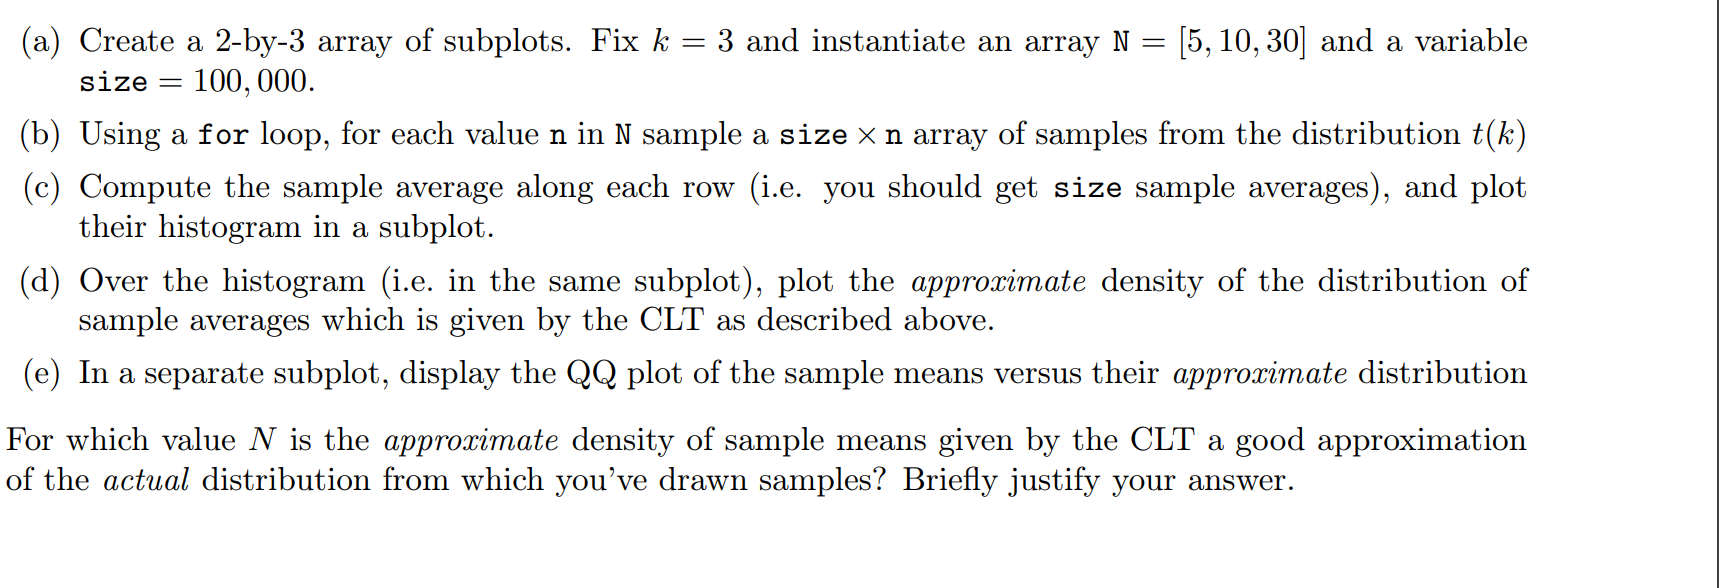

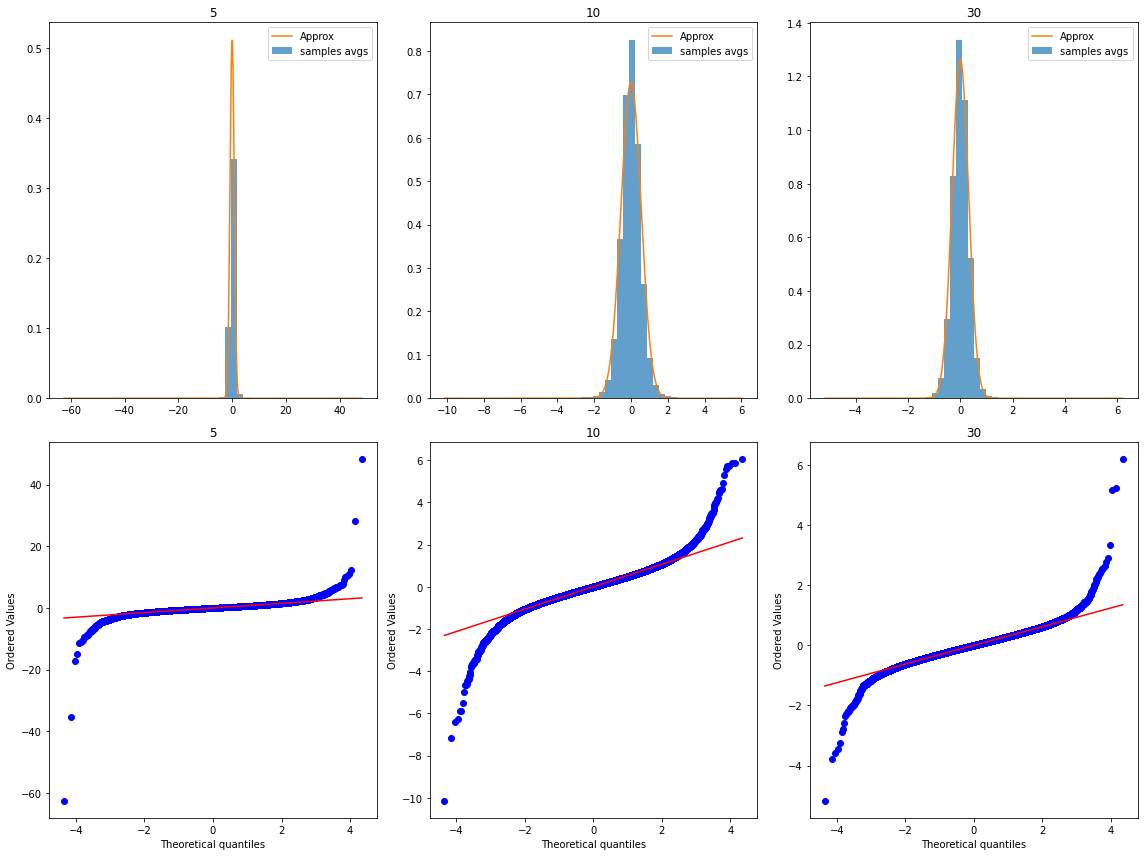

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
k = 3
N = [5, 10, 30]
size = 100000

for i, n in enumerate(N):

    samples = np.random.standard_t(df=k, size=(size, n))
    samples_avgs = np.mean(samples, axis=1)
    
    x_range = np.linspace(min(samples_avgs), max(samples_avgs), 500)
    
    axes[0, i].hist(samples_avgs, bins=50, density=True, alpha=0.7, label='samples avgs')
    axes[0, i].plot(x_range,
                    norm.pdf(x_range, loc = 0, 
                             scale = np.sqrt(k / ((k - 2) * n))),
                    label='Approx')
    
    axes[0, i].set_title("{}".format(n))
    axes[0, i].legend()

    probplot(samples_avgs, plot=axes[1, i], fit=True)
    axes[1, i].set_title("{}".format(n))

plt.tight_layout()
plt.show()

we can see that as N increases, we have a better approximation to the normal distribution (fits better). This shows that it follows the central limit theorem. By looking at the histograms, When N=30 we have the best approximation (compared to the other two values of N) to the normal distribution. Also in the QQ plots, we see that for N=30 we have the least deviation from the line compared to other QQ plots. 

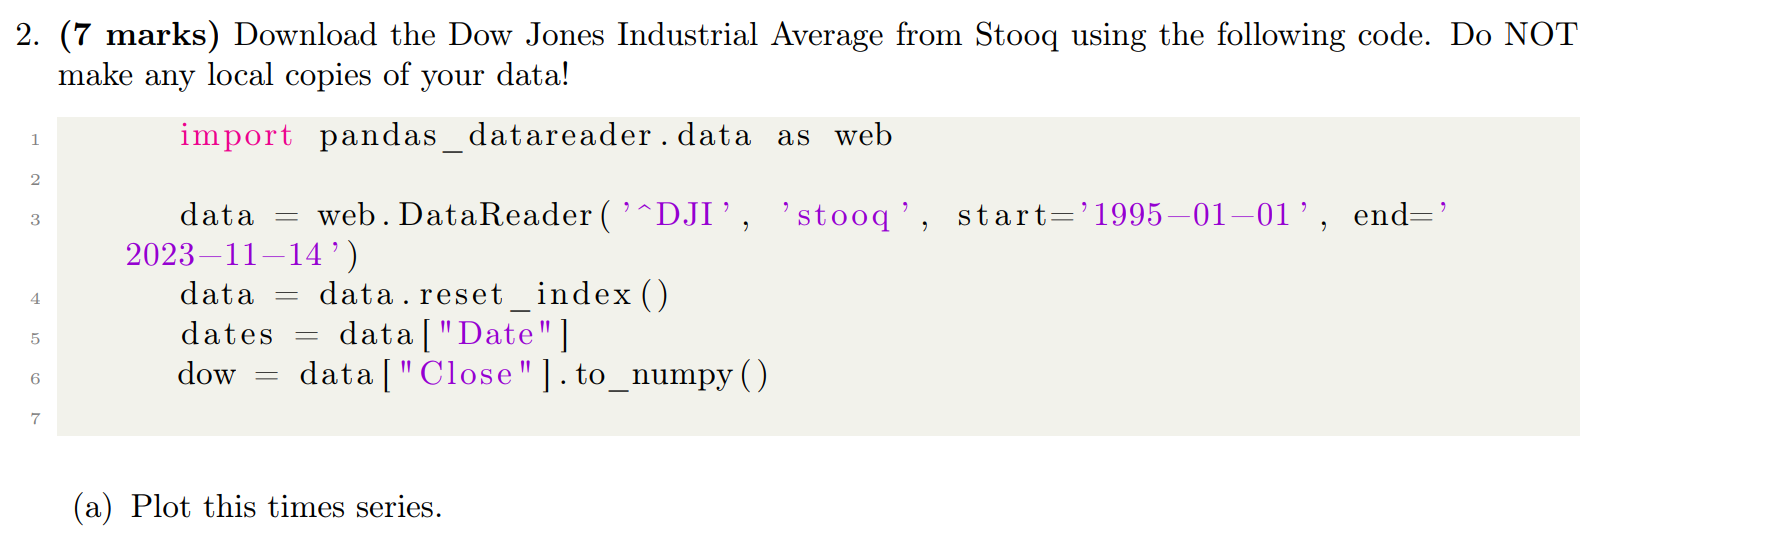

In [73]:
!pip install pandas_datareader


You should consider upgrading via the 'c:\users\kiana\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [74]:
import pandas_datareader.data as web
data = web.DataReader('^DJI', 'stooq', start= '1995-01-01' , end= '2023-11-14')
data = data.reset_index()
dates = data["Date"]
dow = data ["Close"].to_numpy ()

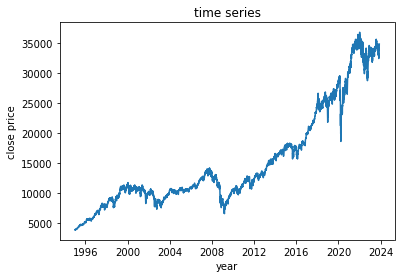

In [75]:
plt.plot(dates, dow)
plt.title('time series')
plt.xlabel('year')
plt.ylabel('close price')
plt.show()

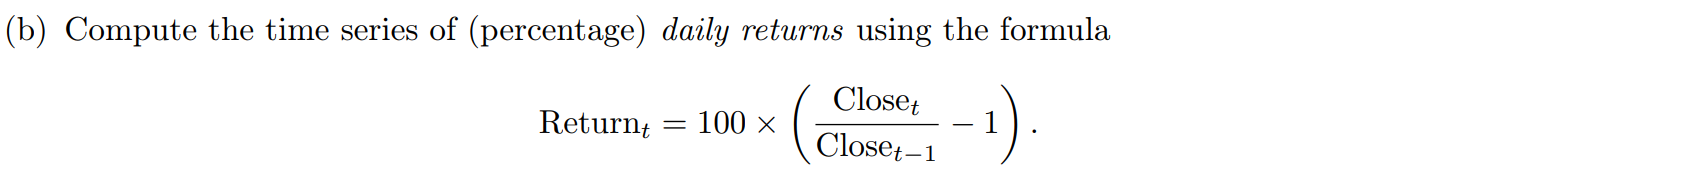

In [76]:
returns = 100 * ((dow[1:]/dow[:-1]) - 1)
returns

array([-1.40643798, -0.1595032 , -1.14097033, ..., -0.42664322,
        0.1765821 , -0.49770589])

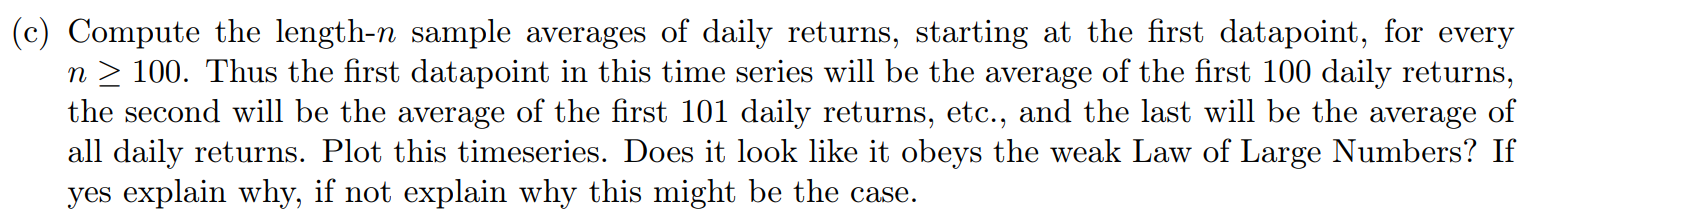

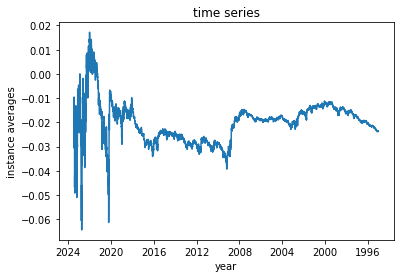

In [77]:
upper_bound = returns.shape[0] + 1
instance_avgs = [returns[0:n].mean() for n in range(100, upper_bound)]

plt.plot(dates[100:], instance_avgs)
plt.title('time series')
plt.xlabel('year')
plt.ylabel('instance averages')
plt.gca().invert_xaxis()
plt.show()

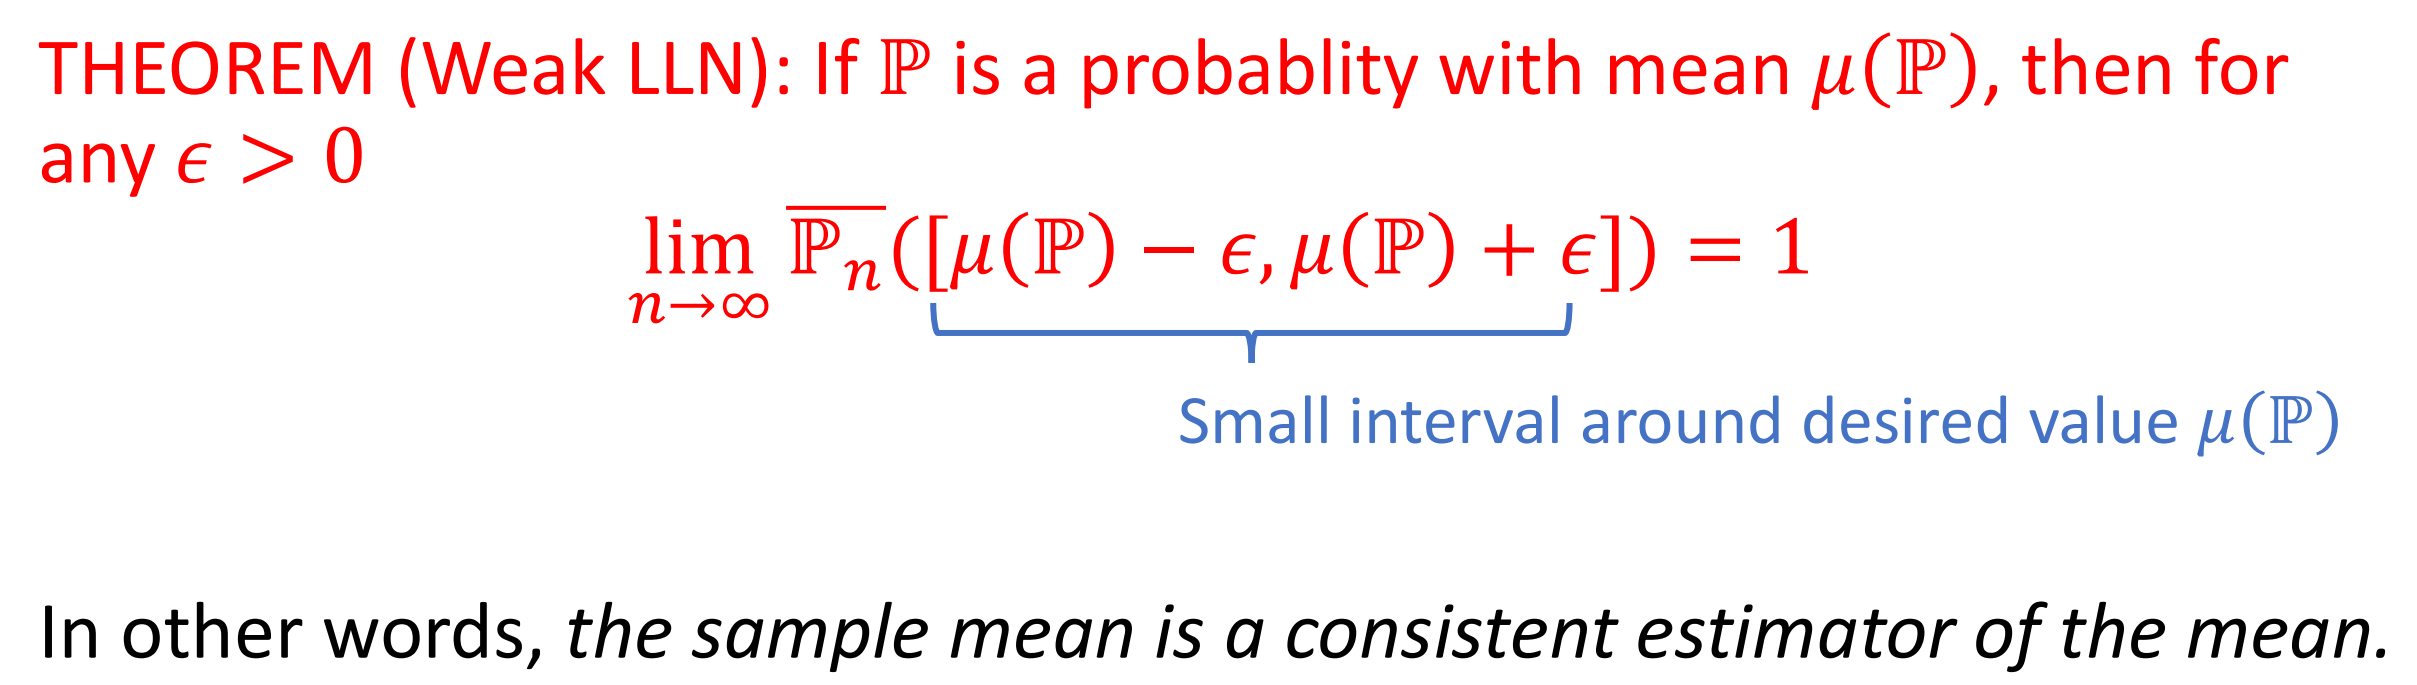

The weak law of large numbers essentially states that for any nonzero specified margin, no matter how small, there is a high probability that the average of a sufficiently large number of observations will be close to the expected value within the margin. WLLN states that as the sample size increases, the sample mean converges in probability to the population mean. we can see that as n increases sample averages converge, so it obeys the WLLN theorem.

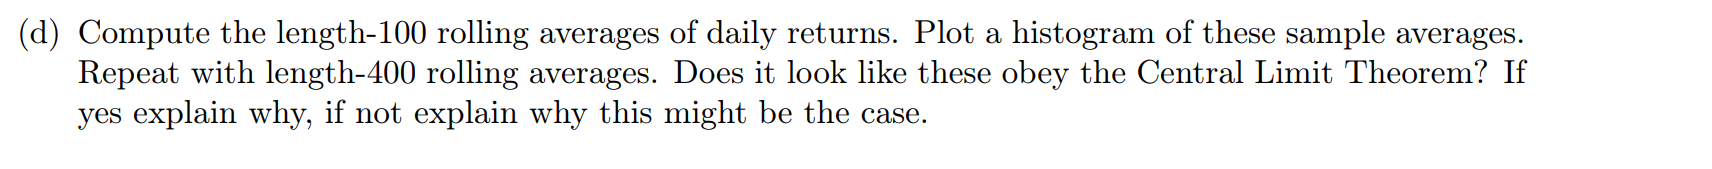

In [78]:
rolling_averages = {}
upper_bound = returns.shape[0] + 1
values_w_100 = list(range(100, upper_bound))
values_w_400 = list(range(400, upper_bound))

rolling_averages[100] = [np.mean(returns[i:values_w_100[i]]) for i in range(len(values_w_100))]
rolling_averages[400] = [np.mean(returns[i:values_w_400[i]]) for i in range(len(values_w_400))]

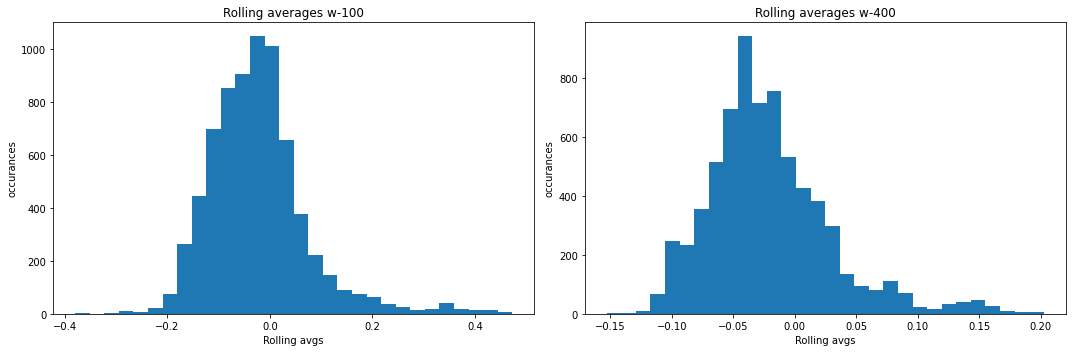

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(rolling_averages[100], bins=30)
plt.title('Rolling averages w-100')
plt.xlabel('Rolling avgs')
plt.ylabel('occurances')

plt.subplot(122)
plt.hist(rolling_averages[400], bins=30)
plt.title('Rolling averages w-400')
plt.xlabel('Rolling avgs')
plt.ylabel('occurances')

plt.tight_layout()
plt.show()

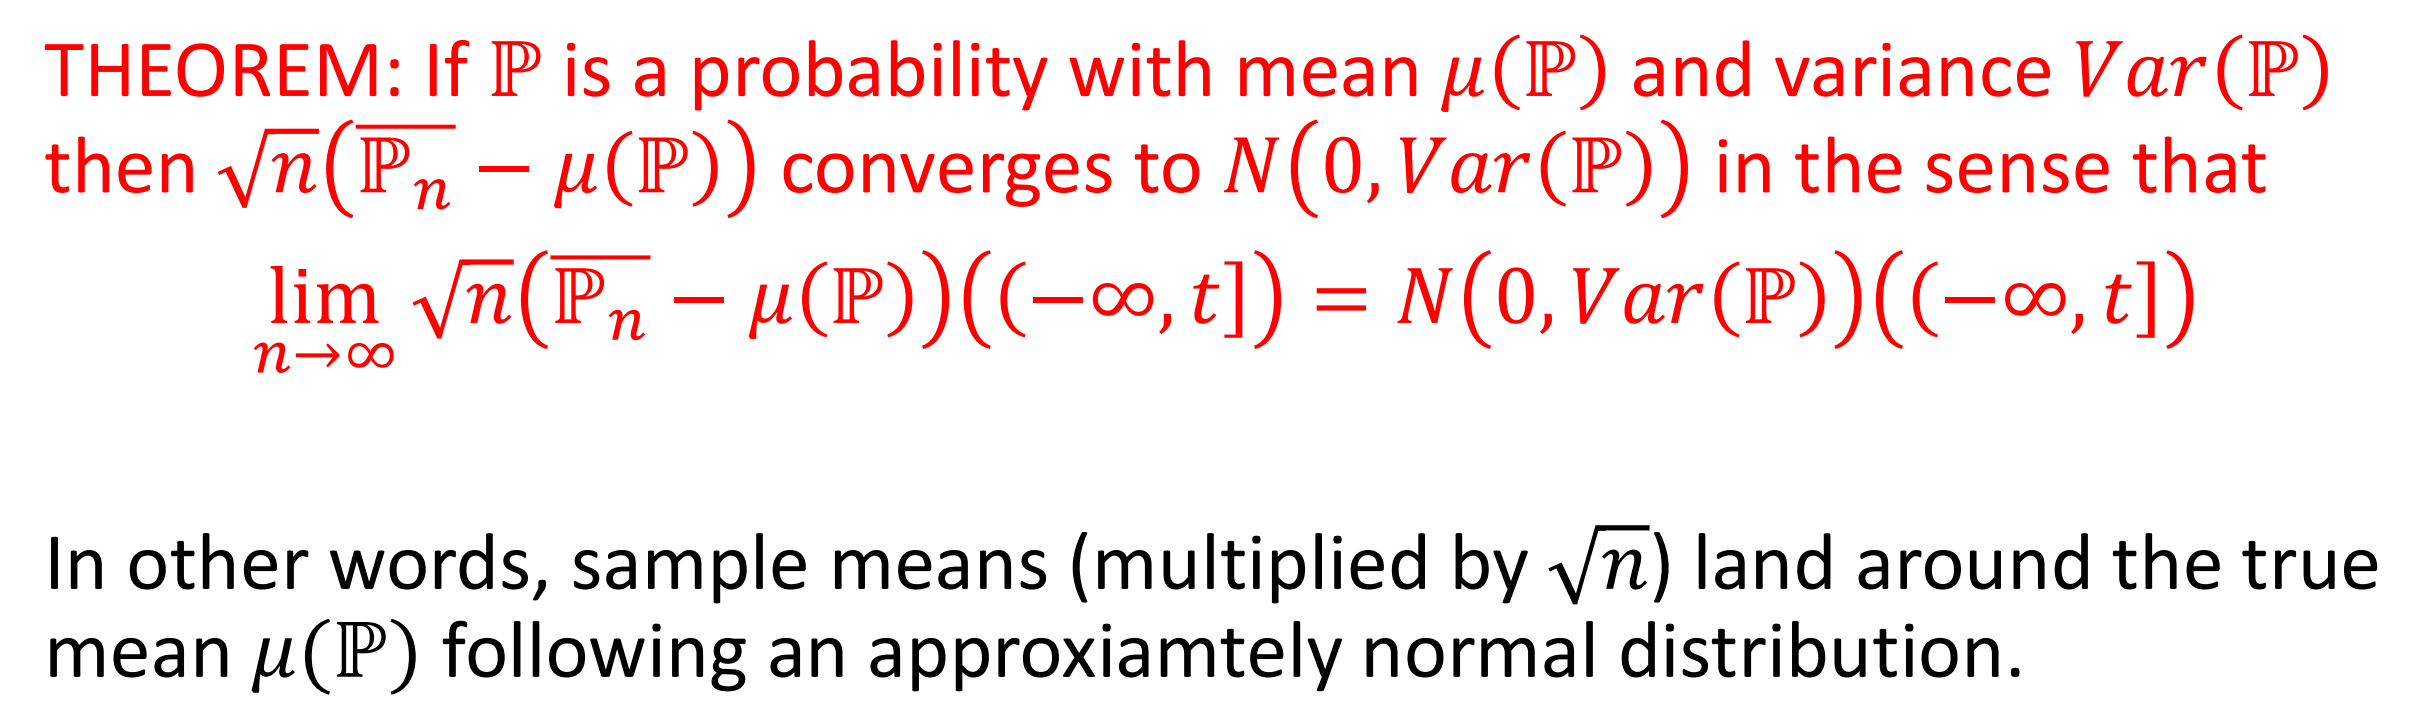

The central limit theorem (CLT) states that the distribution of sample means (of a sufficiently large number of independent, identically distributed random variables) approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. we can see that the histograms of the rolling averages shapes are not similar to the normal distribution shape. They have positive skewness since the right tail of the distribution is longer (more extreme values).Also, when the window size increases they are less bell-shaped and less similar to the shape of the normal distribution. So, it does not obey the central limit theorem.


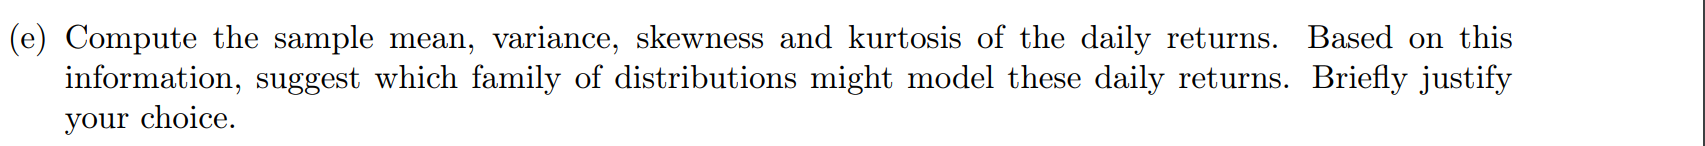

In [80]:
mean = np.mean(returns)
variance= np.var(returns)
skewness = skew(returns)
kurtosis_val = kurtosis(returns)

print("sample mean {}\nsample variance {}\nskewness {}\nkurtosis {}"
      .format(mean,variance,skewness, kurtosis_val))

sample mean -0.023722955410124806
sample variance 1.3280669272904766
skewness 0.6480631209171596
kurtosis 12.97781454831144


The mean is negative means that the average of returns are negative. So, in average we have a daily reduction (a little).
Our skewness value is positive. This means that we have more extreme positive returns since the right tail of the distribution is longer. Also, the value of kurtosis is high means that we heavier tails (more extreme values). According to the above information our distribution can be Student's t-distribution since it may have fat and heavier tails than normal distribution.

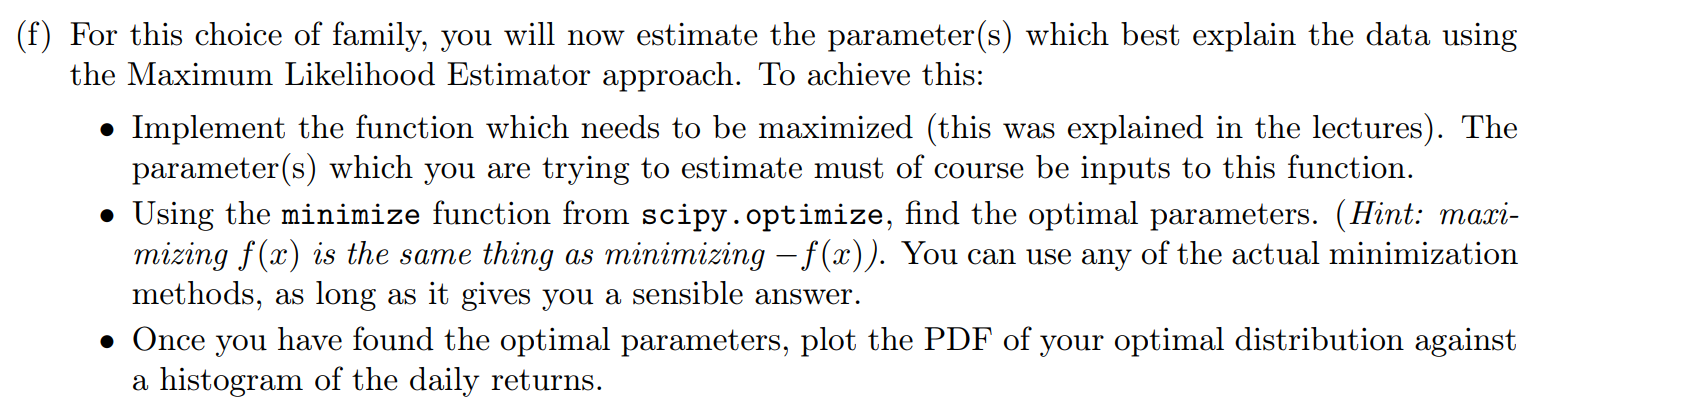

In [81]:
def log_likelihood(params, data):

    return -np.sum(t.logpdf(data, params[0], 
                            loc=params[1], 
                            scale=params[2]))


result = minimize(log_likelihood, 
                  [3, np.mean(returns), np.std(returns)], 
                  args=(returns,))

result.x

array([ 2.85349   , -0.06273682,  0.68881389])

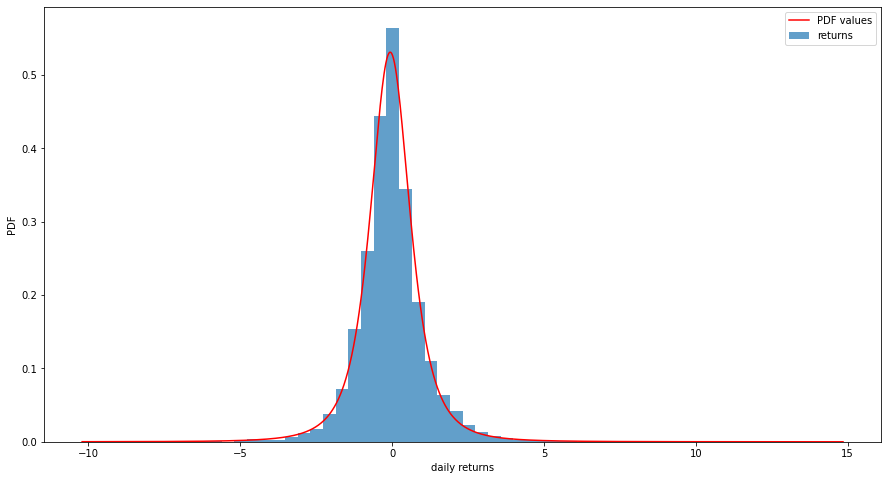

In [82]:
plt.figure(figsize=(15, 8))


plt.hist(returns, bins=60, density=True, 
         alpha=0.7,
         label='returns')

x_range = np.linspace(np.min(returns), np.max(returns), 800)

pdfs = t.pdf(x_range, df=result.x[0], loc=result.x[1], scale=result.x[2])


plt.plot(x_range, pdfs, 'r-', label='PDF values')



plt.xlabel('daily returns')
plt.ylabel('PDF')
plt.legend()
plt.show()

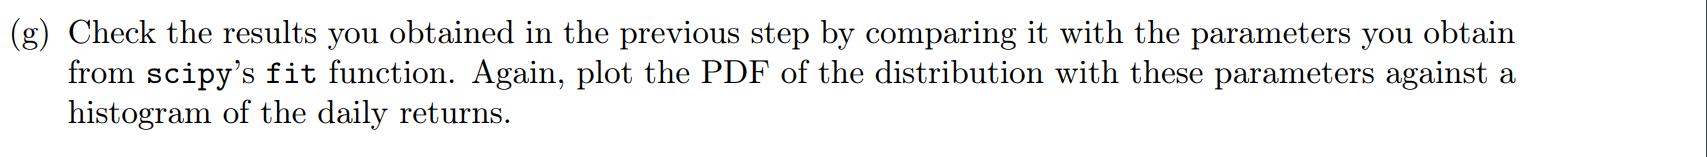

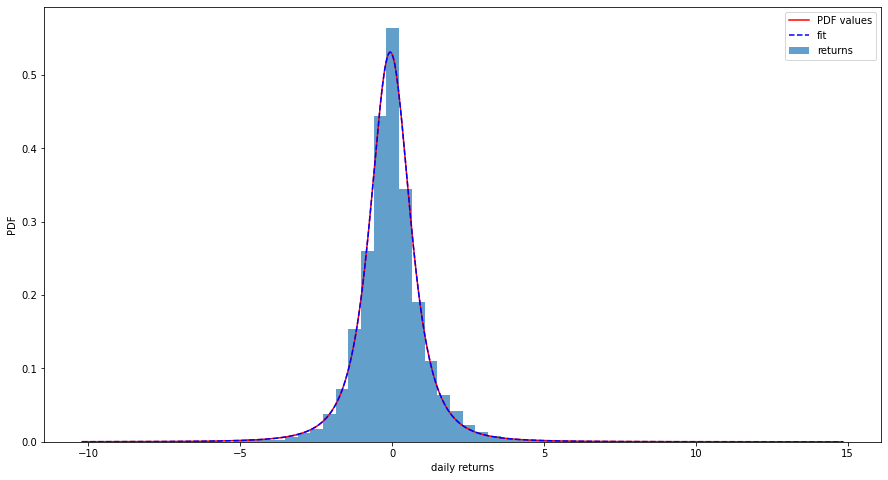

In [83]:
plt.figure(figsize=(15, 8))
fit_result = t.fit(returns)

plt.hist(returns, bins=60, density=True, 
         alpha=0.7,
         label='returns')

x_range = np.linspace(np.min(returns), np.max(returns), 800)

pdfs = t.pdf(x_range, df=result.x[0], loc=result.x[1], scale=result.x[2])
fits = t.pdf(x_range, df=fit_result[0], loc=fit_result[1], scale=fit_result[2])

plt.plot(x_range, pdfs, 'r-', label='PDF values')
plt.plot(x_range, fits, 'b--', label='fit')


plt.xlabel('daily returns')
plt.ylabel('PDF')
plt.legend()
plt.show()